In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data
data=pd.read_csv('dataset - netflix1.csv')

In [3]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### Knowing The Data

In [4]:
data.shape

(8790, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
##Data Preprocessing

In [7]:
#changing data type of date_added to date time
data['date_added']= pd.to_datetime(data['date_added'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [9]:
#there are more movies as compared to TV Show
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [10]:
#top 20 countries
data['country'].value_counts().head(20)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
China              100
Brazil              88
Taiwan              86
Indonesia           86
Name: country, dtype: int64

<AxesSubplot:>

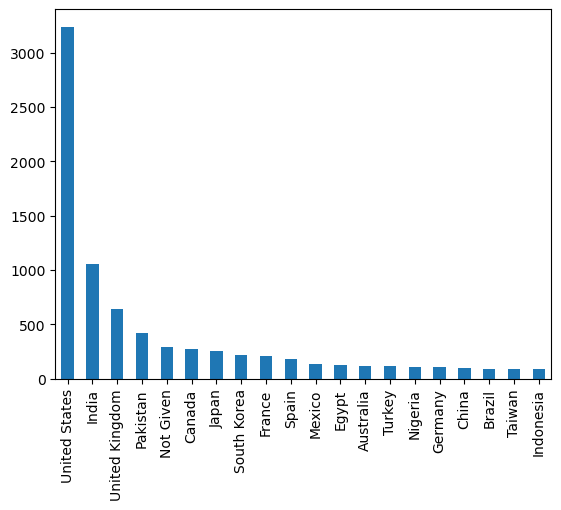

In [11]:
#plotting top 20 countriessum of released shows
data['country'].value_counts().head(20).plot.bar()

In [12]:
#identifying Null values
data[data['country']=='Not Given']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,2021-09-24,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,2019-06-18,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,2021-09-22,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,2020-01-01,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,2018-09-01,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,2019-12-15,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,2019-08-09,2019,TV-MA,96 min,"Documentaries, Sports Movies"


In [13]:
#filtering null values
data_final = data[data.country !='Not Given']

<AxesSubplot:>

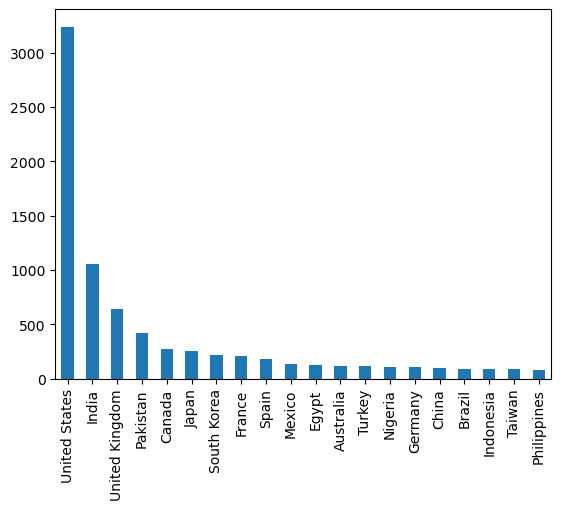

In [14]:
data_final['country'].value_counts().head(20).plot.bar()

In [15]:
data_final

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [ ]:
#identifying Null values

In [16]:
data_final['director'].value_counts().head(20)

Not Given                       2588
Rajiv Chilaka                     20
Alastair Fothergill               18
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
Cathy Garcia-Molina               13
Martin Scorsese                   12
Jay Chapman                       12
Youssef Chahine                   12
Steven Spielberg                  11
Don Michael Paul                  10
Mark Thornton, Todd Kauffman      10
David Dhawan                       9
Shannon Hartman                    8
Kunle Afolayan                     8
Hakan Algül                        8
Quentin Tarantino                  8
Robert Rodriguez                   8
Name: director, dtype: int64

In [17]:
#filtering null values
data_final = data_final[data.director !='Not Given']

In [18]:
#rajiv chilaka has highest number of shows as a director
data_final['director'].value_counts().head(20)

Rajiv Chilaka                   20
Alastair Fothergill             18
Raúl Campos, Jan Suter          18
Marcus Raboy                    16
Suhas Kadav                     16
Jay Karas                       14
Cathy Garcia-Molina             13
Martin Scorsese                 12
Jay Chapman                     12
Youssef Chahine                 12
Steven Spielberg                11
Mark Thornton, Todd Kauffman    10
Don Michael Paul                10
David Dhawan                     9
Robert Rodriguez                 8
Troy Miller                      8
Quentin Tarantino                8
Yılmaz Erdoğan                   8
Ryan Polito                      8
Lance Bangs                      8
Name: director, dtype: int64

In [19]:
#shows with TV MA ratings are most
data['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [20]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [21]:
#one hot encoding categorical data column(type)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(data[["type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Movie', 1:'TV Show'})
data_final = data_final.join(encoder_df)

In [22]:
data_final

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Movie,TV Show
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,1.0,0.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",0.0,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",0.0,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",1.0,0.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019-11-01,2019,TV-Y,24 min,Children & Family Movies,1.0,0.0
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,1.0,0.0
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019-08-30,2019,TV-Y,3 Seasons,Kids' TV,0.0,1.0
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2018-12-31,2016,TV-MA,29 min,Documentaries,1.0,0.0


In [ ]:
#dropping type column
#data_final.drop(['type'], axis=1, inplace = True)

In [ ]:
#data_final

In [23]:
#top 10 countries that released movies
data_final.groupby('country')['Movie'].sum().sort_values(ascending=False).head(10)

country
United States     2336.0
India              964.0
United Kingdom     369.0
Canada             184.0
France             148.0
Spain              127.0
Egypt              107.0
Nigeria             96.0
Mexico              89.0
Japan               86.0
Name: Movie, dtype: float64

<AxesSubplot:xlabel='country'>

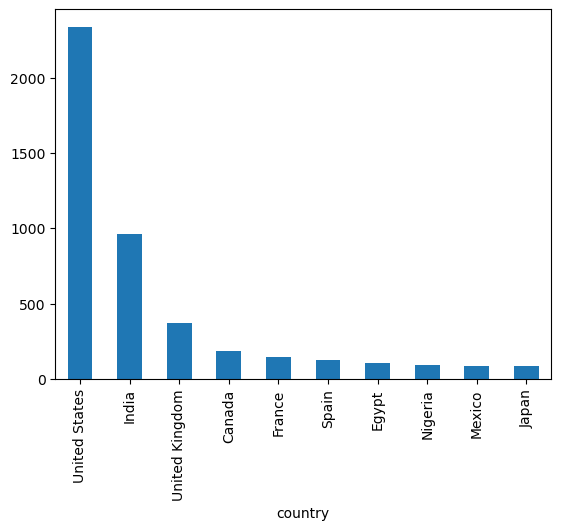

In [24]:
data_final.groupby('country')['Movie'].sum().sort_values(ascending=False).head(10).plot.bar()

In [25]:
#top 10 countries who has TV Shows originated under them
data_final.groupby('country')['TV Show'].sum().sort_values(ascending=False).head(10)

country
United States     65.0
United Kingdom    37.0
Spain             13.0
India             11.0
South Korea       11.0
Japan             10.0
Taiwan             9.0
France             8.0
Brazil             6.0
Thailand           5.0
Name: TV Show, dtype: float64

<AxesSubplot:xlabel='country'>

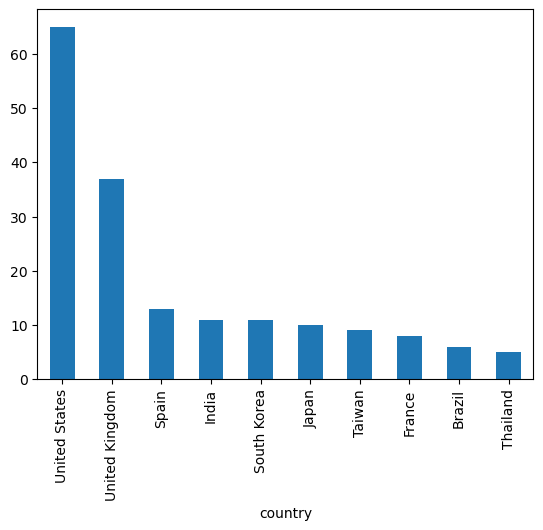

In [26]:
data_final.groupby('country')['TV Show'].sum().sort_values(ascending=False).head(10).plot.bar()

In [27]:
#grouping data according to country and type (top 20)
data_final.groupby(['country','type'])['director'].count().sort_values(ascending=False).head(20)

country         type   
United States   Movie      2336
India           Movie       964
United Kingdom  Movie       369
Canada          Movie       184
France          Movie       148
Spain           Movie       127
Egypt           Movie       107
Nigeria         Movie        96
Mexico          Movie        89
Japan           Movie        86
Indonesia       Movie        84
Turkey          Movie        80
Philippines     Movie        80
Germany         Movie        77
Hong Kong       Movie        75
United States   TV Show      65
Australia       Movie        61
China           Movie        58
Brazil          Movie        57
Argentina       Movie        56
Name: director, dtype: int64

<AxesSubplot:xlabel='type,director,country'>

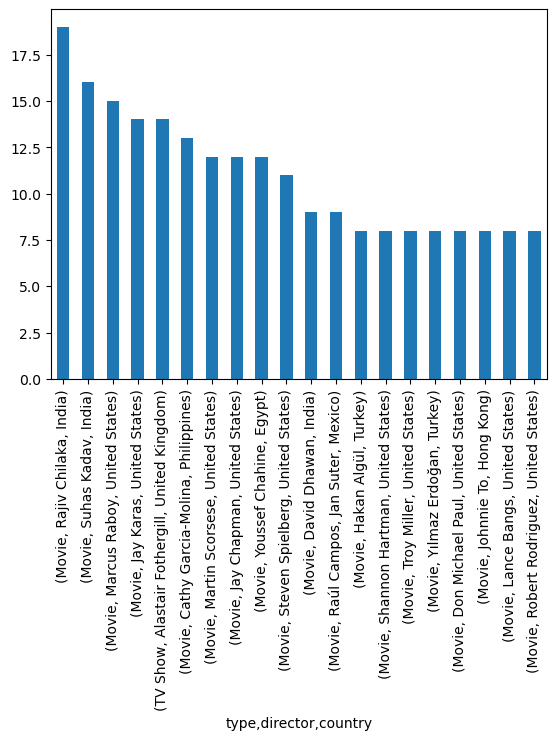

In [28]:
data_final.groupby(['type','director','country'])['country'].count().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='type,country'>

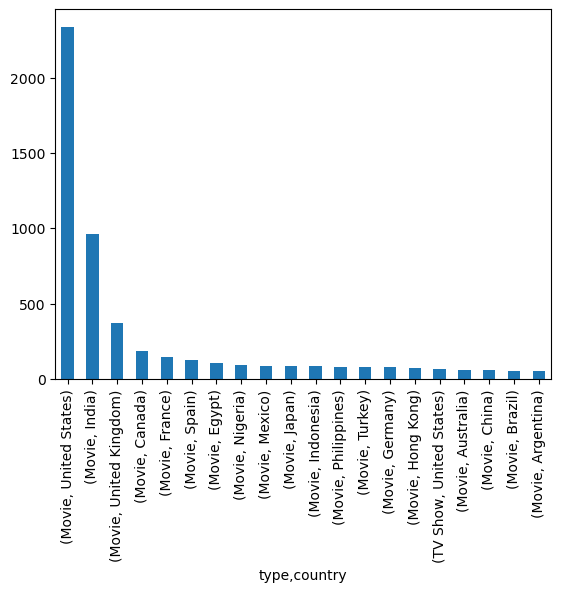

In [29]:
#top 20 countries with highest number of shows
data_final.groupby(['type','country'])['show_id'].count().sort_values(ascending=False).head(20).plot.bar()

In [30]:
top10countries=data.groupby('country')['type'].count().sort_values(ascending=False).head(10).index.tolist()
top10countries

['United States',
 'India',
 'United Kingdom',
 'Pakistan',
 'Not Given',
 'Canada',
 'Japan',
 'South Korea',
 'France',
 'Spain']

In [31]:
#top 20 directors according to the number of shows directed by them
data_final.groupby(['country','director'])['TV Show'].count().sort_values(ascending=False).head(20)

country         director              
India           Rajiv Chilaka             20
United Kingdom  Alastair Fothergill       18
India           Suhas Kadav               16
United States   Marcus Raboy              16
                Jay Karas                 14
Philippines     Cathy Garcia-Molina       13
Egypt           Youssef Chahine           12
United States   Jay Chapman               12
                Martin Scorsese           12
                Steven Spielberg          11
Mexico          Raúl Campos, Jan Suter     9
India           David Dhawan               9
United States   Robert Rodriguez           8
                Don Michael Paul           8
                Troy Miller                8
Hong Kong       Johnnie To                 8
United States   Ryan Polito                8
Turkey          Hakan Algül                8
                Yılmaz Erdoğan             8
Nigeria         Kunle Afolayan             8
Name: TV Show, dtype: int64

In [32]:
#most content released in 2017
top10countries=data_final.groupby('release_year')['show_id'].count().sort_values(ascending=False).head(10).index.tolist()
top10countries

[2017, 2018, 2016, 2019, 2020, 2015, 2014, 2013, 2021, 2012]

In [33]:
#grouping shows according to the director with highest releases for specific year
data_final.groupby(['country','type','director','release_year'])['release_year'].count().sort_values(ascending=False).head(20)

country         type   director                                    release_year
India           Movie  Rajiv Chilaka                               2013            6
United States   Movie  Marcus Raboy                                2017            6
Argentina       Movie  Raúl Campos, Jan Suter                      2018            5
Nigeria         Movie  Kayode Kasum                                2020            4
United Kingdom  Movie  Edward Cotterill                            2017            4
United States   Movie  Matt Askem                                  2018            4
India           Movie  Suhas Kadav                                 2019            4
                                                                   2018            4
                                                                   2017            4
United States   Movie  Krysia Plonka, Kristian Mercado             2021            4
                       Jay Chapman                                 201

<AxesSubplot:xlabel='country,type,director,release_year'>

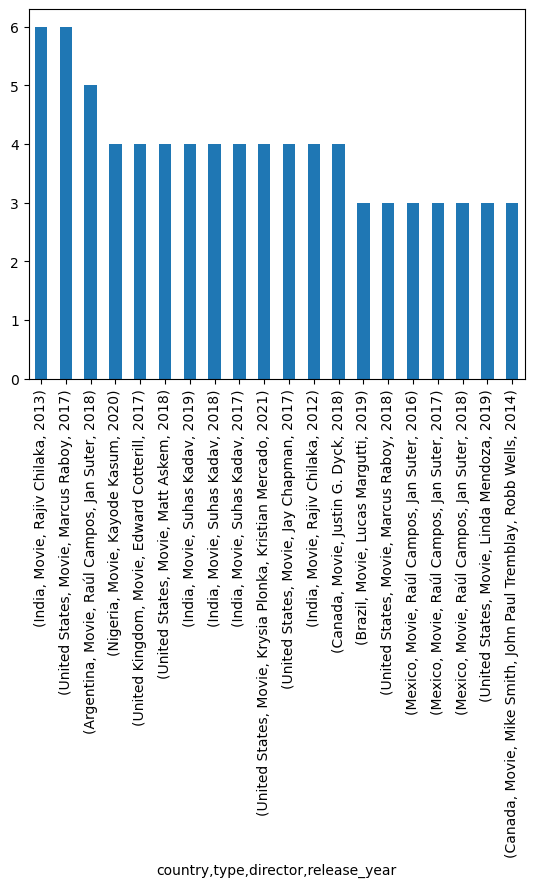

In [34]:
data_final.groupby(['country','type','director','release_year'])['release_year'].count().sort_values(ascending=False).head(20).plot.bar()

In [35]:
#total release per year by each country(top 20)
data_final.groupby(['country','release_year'])['release_year'].count().sort_values(ascending=False).head(20)

country         release_year
United States   2017            306
                2018            266
                2019            240
                2016            238
                2020            188
                2015            139
India           2017            104
United States   2014             95
India           2018             94
                2019             88
United States   2013             85
                2021             74
                2012             73
India           2016             73
                2020             64
United States   2011             63
                2010             63
United Kingdom  2016             60
India           2013             59
                2015             58
Name: release_year, dtype: int64

In [36]:
#segregating according to type
data_final.groupby(['country','type','release_year'])['release_year'].count().sort_values(ascending=False).head(20)

country         type   release_year
United States   Movie  2017            299
                       2018            258
                       2016            235
                       2019            227
                       2020            180
                       2015            135
India           Movie  2017            103
United States   Movie  2014             92
India           Movie  2018             92
                       2019             86
United States   Movie  2013             83
                       2012             73
India           Movie  2016             73
United States   Movie  2010             63
                       2011             63
India           Movie  2020             62
United States   Movie  2021             61
India           Movie  2013             59
United Kingdom  Movie  2016             57
India           Movie  2015             57
Name: release_year, dtype: int64

In [37]:
#as we can see movies are mostly seen in the top 20 lets analyse the same for tv shows for each country(top 20) by release year
data_final.groupby(['country','type','release_year'])['TV Show'].sum().sort_values(ascending=False).head(20)

country         type     release_year
United States   TV Show  2019            13.0
                         2021            13.0
                         2018             8.0
                         2020             8.0
                         2017             7.0
United Kingdom  TV Show  2020             5.0
                         2017             4.0
                         2015             4.0
                         2021             4.0
United States   TV Show  2015             4.0
Spain           TV Show  2021             4.0
                         2020             4.0
Taiwan          TV Show  2020             4.0
Spain           TV Show  2019             3.0
United States   TV Show  2014             3.0
Thailand        TV Show  2020             3.0
United Kingdom  TV Show  2009             3.0
France          TV Show  2021             3.0
                         2020             3.0
Brazil          TV Show  2020             3.0
Name: TV Show, dtype: float64